       S       v
0    4.7  0.1973
1    9.4  0.6750
2   18.8  1.0690
3   38.0  1.4890
4   75.0  1.8000
5  150.0  2.3700
6  300.0  2.8000

Km =  41.74
Vmax =  3.08

covar =  [[2.57706418e-02 8.99437077e-01]
 [8.99437077e-01 4.42081875e+01]]


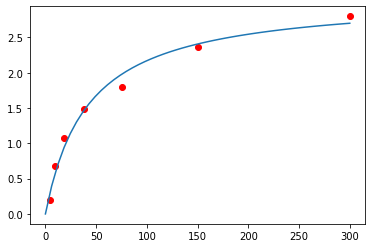

In [1]:
"""
Created on Tue Jun  7 13:01:21 2022
NL-MM: non-linear michalis menton
Created on Mon May  9 16:43:18 2022
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit
@author: fnorris
"""
import pandas as pd
import scipy
from scipy import optimize
import numpy as np
import pylab as plt

#read the data file into a dataframe and assign data to lists...also find the maximum value of s

df =pd.read_csv('C:/Users/fnorris/Documents/plate_reader_data/Results.csv')
print(df)

s = df['S'].tolist()
v = df['v'].tolist()
sMax = int(max(s))

# define the model to be fit

def model(s, Vm, Km):
    return (Vm*s/(Km+s))


# plot the data points as red circles
plt.plot(s,v, "ro")

# non-linear fit using the model

parameters, covar = scipy.optimize.curve_fit(model, s, v)

print('')
print('Km = ',round(parameters[1],2))
print('Vmax = ',round(parameters[0],2))
print('')
print('covar = ',covar)

# plot the fitted line 
t= np.linspace(0,sMax)
plt.plot(t,model(t,*parameters))
plt.show()